# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

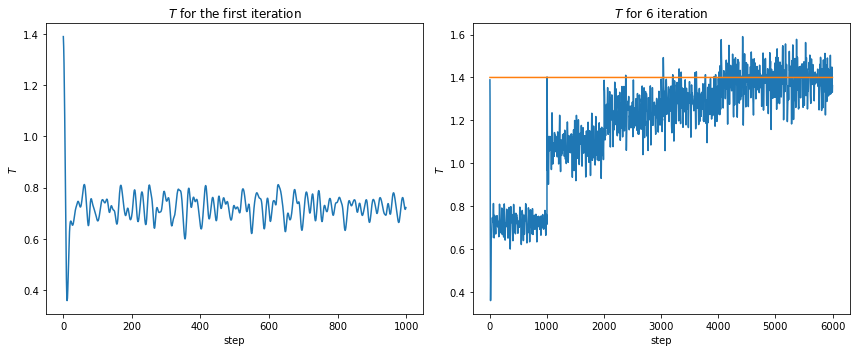

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 1000
Nrep = 6
T = np.zeros(Nrep * N)
T1 = np.zeros(N)
filein = open("MolecularDynamics_NVE/output_temp.dat")
for i in range(Nrep * N):
    T[i] = float(filein.readline())
    if i < N:
        T1[i] = T[i]
filein.close()

plt.rcParams["figure.figsize"]=(12,5)
fig, ax = plt.subplots(1, 2, tight_layout=True)

x = np.arange(N)
ax[0].plot(x, T1)
ax[0].set_xlabel(r'step')
ax[0].set_ylabel(r'$T$')
ax[0].set_title(r'$T$ for the first iteration')

x = np.arange(Nrep * N)
y = np.zeros(Nrep * N) + 1.4
ax[1].plot(x, T)
ax[1].plot(x, y)
ax[1].set_xlabel(r'step')
ax[1].set_ylabel(r'$T$')
ax[1].set_title(f"$T$ for {Nrep} iteration")

plt.show()

As we can see from the plots, at the first run the temperature drops after the first step, but after a few runs it converges to the desired value of $1.4$.

### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

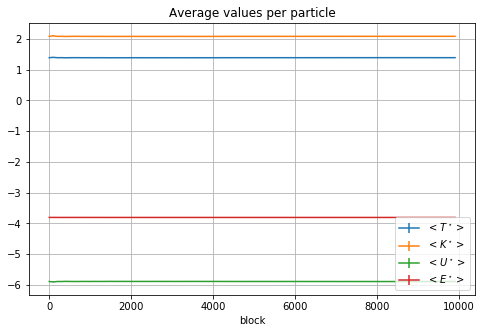

In [35]:
plt.rcParams["figure.figsize"]=(8,5)
filein = open("Plots/out_temp.txt")
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
#x*=L
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
plt.errorbar(x,sum_prog,yerr=err_prog, label=r'$<T^\star>$')



filein = open("Plots/out_ekin.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
plt.errorbar(x,sum_prog,yerr=err_prog, label=r'$<K^\star>$')



filein = open("Plots/out_epot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
plt.errorbar(x,sum_prog,yerr=err_prog, label=r'$<U^\star>$')



filein = open("Plots/out_etot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
plt.errorbar(x,sum_prog,yerr=err_prog, label=r'$<E^\star>$')



plt.xlabel('block')
plt.title('Average values per particle')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

Done with 100000 data points, with 100 points per block. As we expeceted, the value of $E$ is constant throughout the simulation.
For the other variables the fluctuations are very small, almost unoticeable.

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

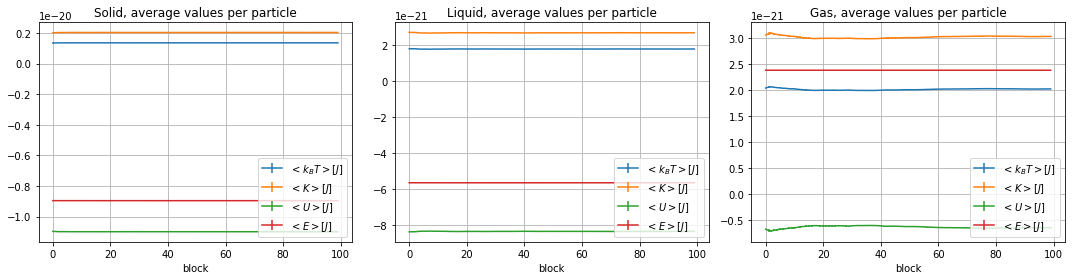

In [47]:
plt.rcParams["figure.figsize"]=(15,4)
fig, ax = plt.subplots(1, 3, tight_layout=True)

epsilon = 120 * 1.38 * 10**(-23)

# Solid
filein = open("Plots/out_solid_temp.txt")
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
#x*=L
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[0].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<k_{B}T> [J]$')



filein = open("Plots/out_solid_ekin.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[0].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<K> [J]$')



filein = open("Plots/out_solid_epot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[0].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<U> [J]$')



filein = open("Plots/out_solid_etot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[0].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<E> [J]$')

ax[0].set_xlabel('block')
ax[0].set_title('Solid, average values per particle')
ax[0].grid(True)
ax[0].legend(loc='lower right')


# Liquid
filein = open("Plots/out_liquid_temp.txt")
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[1].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<k_{B}T> [J]$')



filein = open("Plots/out_liquid_ekin.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[1].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<K> [J]$')



filein = open("Plots/out_liquid_epot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[1].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<U> [J]$')



filein = open("Plots/out_liquid_etot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[1].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<E> [J]$')

ax[1].set_xlabel('block')
ax[1].set_title('Liquid, average values per particle')
ax[1].grid(True)
ax[1].legend(loc='lower right')


# Gas
filein = open("Plots/out_gas_temp.txt")
M = int(filein.readline())
N = int(filein.readline())
L = int(M/N)
sum_prog = np.zeros(N)
err_prog = np.zeros(N)
x = np.arange(N)
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[2].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<k_{B}T> [J]$')



filein = open("Plots/out_gas_ekin.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[2].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<K> [J]$')


filein = open("Plots/out_gas_epot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[2].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<U> [J]$')



filein = open("Plots/out_gas_etot.txt")
M = int(filein.readline())
N = int(filein.readline())
for i in range(N):
    sum_prog[i] = float(filein.readline())
for i in range(N):
    err_prog[i] = float(filein.readline())
filein.close()
ax[2].errorbar(x,sum_prog*epsilon,yerr=err_prog*epsilon, label=r'$<E> [J]$')

ax[2].set_xlabel('block')
ax[2].set_title('Gas, average values per particle')
ax[2].grid(True)
ax[2].legend(loc='lower right')
plt.show()

Done with 100000 data points, with 100 points per block.
The fluctuations of the variables are not significant, except for the gas. But even there the total energy $E$ remains constant, as we expected.

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$